In [1]:
!python --version

Python 3.9.7


In [2]:
import os
import cv2 as cv
import json
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [3]:
with open(r'D:\fharookshaik\major_project\result.json','r') as f:
    result = json.load(f)
f.close()

In [4]:
result[0]

{'frame_id': 1,
 'filename': 'D:/fharookshaik/major_project/dataset/Train/images/covid_memes_18.png',
 'objects': [{'class_id': 0,
   'name': 'person',
   'relative_coordinates': {'center_x': 0.270268,
    'center_y': 0.767912,
    'width': 0.365334,
    'height': 0.462601},
   'confidence': 0.93601},
  {'class_id': 0,
   'name': 'person',
   'relative_coordinates': {'center_x': 0.725959,
    'center_y': 0.762867,
    'width': 0.337041,
    'height': 0.472465},
   'confidence': 0.927159}]}

In [5]:
(76 / 1172)

0.06484641638225255

In [6]:
# img.shape

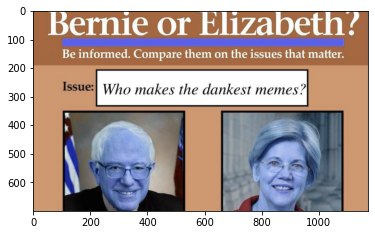

In [7]:
img = cv.imread(result[0].get('filename'))
plt.imshow(img)

In [8]:
import tensorflow as tf
from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

In [9]:
WIDTH, HEIGHT = (1024,768)

image = tf.io.read_file(result[0].get('filename'))
image = tf.io.decode_image(image)
image = tf.image.resize(image, (HEIGHT, WIDTH))
images = tf.expand_dims(image, axis=0) / 255

In [10]:
model = YOLOv4(
    input_shape=(HEIGHT,WIDTH,3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    yolo_max_boxes=50,
    training=False,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

model.load_weights(r'D:\fharookshaik\major_project\models\yolo-v4\yolov4.h5')

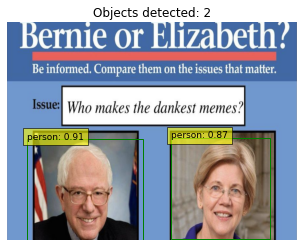

In [11]:
boxes, scores, classes, detections = model.predict(images)
 
boxes = boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT]
scores = scores[0]
classes = classes[0].astype(int)
detections = detections[0]
 
CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop',  'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
 
plt.imshow(images[0])
ax = plt.gca()
 
for (xmin, ymin, xmax, ymax), score, class_idx in zip(boxes, scores, classes):
    if score > 0:
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, color='green')
        ax.add_patch(rect)
 
        text = CLASSES[class_idx] + ': {0:.2f}'.format(score)
        ax.text(xmin, ymin, text, fontsize=9, bbox=dict(facecolor='yellow', alpha=0.6))
 
plt.title('Objects detected: {}'.format(detections))
plt.axis('off')
plt.show()

In [15]:
for (xmin,ymin,xmax,ymax), score, class_idx in zip(boxes,scores,classes):
    if score > 0:
        print(xmin,ymin,xmax-xmin,ymax-ymin)

69.57872009277344 412.0487823486328 409.6980743408203 354.8858642578125
578.875 406.6974334716797 348.830322265625 358.0487365722656
